# 邊緣檢測算法簡介
邊緣檢測是一種在數字圖像處理和計算機視覺中常用的技術。它用於識別圖像中的邊界和輪廓，對於形狀分析、物體識別和圖像分割非常重要。<br>
下列將介紹一些基本概念、邊緣檢測算法以及應用示例。

## 邊緣檢測的基本概念
邊緣是在圖像中亮度或顏色急劇變化的地方。邊緣檢測的目的是找到這些變化點，從而識別圖像中的結構和輪廓。

#### 增加對比與亮度
cv2.convertScaleAbs(img, output, alpha, beta)
* img 來源影像
* output 輸出影像，公式：output = img*alpha + beta
* alpha, beta 公式中的參數

## 1. Roberts算子
Roberts算子是一種基於局部差分的邊緣檢測方法。它通過計算相鄰像素之間的差分來識別邊緣

- **邊緣定位準確**：能夠找到邊緣的精確位置
- **對噪聲敏感**：容易受到噪聲的影響
- **應用場景**：適用於邊緣明顯且噪聲較少的圖像

Roberts算子通常在圖像邊緣附近產生較寬的響應，檢測的邊緣常需要細化處理



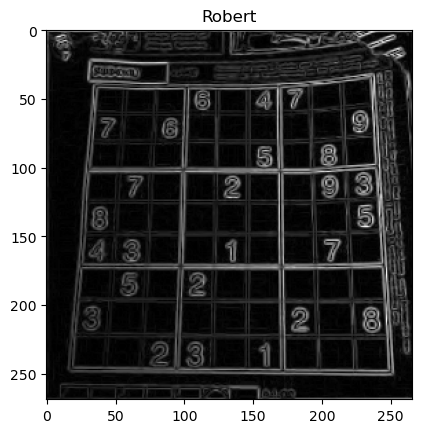

In [15]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
img = cv2.imread('data/dave.jpg',0)
#img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

robert_x = np.array([[1, 0],[0, -1]], dtype=np.float32)
robert_y = np.array([[0, -1],[1, 0]], dtype=np.float32)

filteredx = cv2.filter2D(img,cv2.CV_64F,robert_x)
filteredx = cv2.convertScaleAbs(filteredx)
filteredy = cv2.filter2D(img,cv2.CV_64F,robert_y)
filteredy = cv2.convertScaleAbs(filteredy)
filtered = cv2.add(filteredx,filteredy)
filtered = cv2.convertScaleAbs(filtered)

plt.imshow(filtered ,cmap = 'gray')
plt.title('Robert')
plt.show()


In [16]:
import numpy as np
from scipy import signal
import cv2

def roberts(I,_boundary='fill',_fillvalue=0):
    #圖像的高、寬
    H1,W1=I.shape[0:2]
    #卷積核的尺寸
    H2,W2=2,2
    #卷積核 1 及 錨點的位置
    R1 = np.array([[1,0],[0,-1]],np.float32)
    kr1,kc1=0,0
    #計算 fuLl 卷積
    IconR1 = signal.convolve2d(I,R1,mode='full',boundary = _boundary,fillvalue=_fillvalue)
    IconR1=IconR1[H2-kr1-1:H1+H2-kr1-1,W2-kc1-1:W1+W2-kc1-1]
    #卷積核2
    R2 = np.array([[0,1],[-1,0]],np.float32)
    #先計算 full 卷積
    IconR2 = signal.convolve2d(I,R2,mode='full',boundary = _boundary,fillvalue=_fillvalue)
    #錨點的位置
    kr2,kc2 = 0,1
    #根據錨點的位置，截取 full卷積，從而得到 same 卷積
    IconR2=IconR2[H2-kr2-1:H1+H2-kr2-1,W2-kc2-1:W1+W2-kc2-1]
    return (IconR1,IconR2)


image = cv2.imread('data/robert.png',cv2.IMREAD_GRAYSCALE)
cv2.imshow("image",image)
#卷積，注意邊界擴充一般採用 " symm " ->使用對稱邊界條件以避免在圖像邊界處創建邊緣。
IconR1,IconR2 = roberts(image,'symm')
#45度方向上的邊緣強度的灰度級顯示
IconR1 = np.abs(IconR1)
edge_45 = IconR1.astype(np.uint8)
cv2.imshow("edge_45",edge_45)
cv2.imwrite("img3_robert_45_edge.jpg",edge_45)
#135度方向上的邊緣強度
IconR2 = np.abs(IconR2)
edge_135 = IconR2.astype(np.uint8)
cv2.imshow("edge_135",edge_135)
cv2.imwrite("img3_robert_135_edge.jpg",edge_135)
#用平方和的開方衡量最後的輸出邊緣
edge = np.sqrt(np.power(IconR1,2.0) + np.power(IconR2,2.0))
edge = np.round(edge)
edge[edge>255] = 255
edge = edge.astype(np.uint8)
#顯示邊緣
cv2.imshow("edge",edge)
cv2.imwrite("img3_robert_edge.jpg",edge)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 2. Prewitt算子
Prewitt算子使用像素的平均值來檢測邊緣，是一種更為平滑的邊緣檢測方法

- **抑制噪聲**：像素平均過程可減少噪聲的影響
- **邊緣定位較弱**：平均過程可能導致定位不夠準確
- **應用場景**：適合含有一定噪聲的圖像

Prewitt算子在降低噪聲和檢測邊緣之間取得了平衡



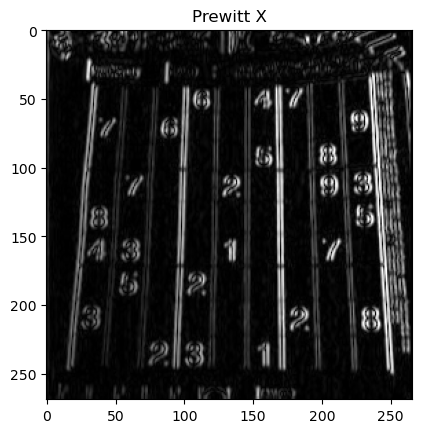

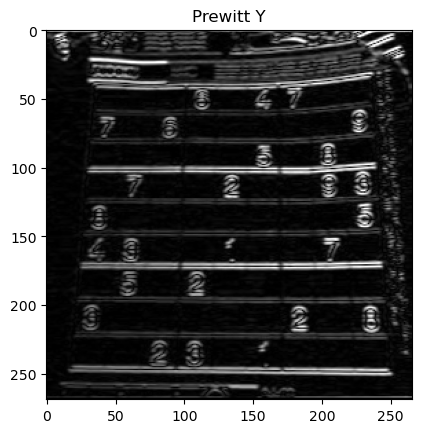

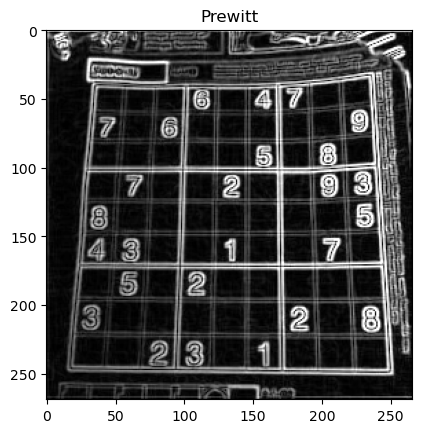

In [18]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt
img = cv2.imread('data/dave.jpg',0)
#img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)

filteredx = cv2.filter2D(img,cv2.CV_64F,prewitt_x)
filteredx = cv2.convertScaleAbs(filteredx)
filteredy = cv2.filter2D(img,cv2.CV_64F,prewitt_y)
filteredy = cv2.convertScaleAbs(filteredy)
filtered = cv2.add(filteredx,filteredy)
#filtered = cv2.convertScaleAbs(filtered)

plt.imshow(filteredx,cmap = 'gray')
plt.title('Prewitt X')
plt.show()
plt.imshow(filteredy,cmap = 'gray')
plt.title('Prewitt Y')
plt.show()
plt.imshow(filtered ,cmap = 'gray')
plt.title('Prewitt')
plt.show()


## 3. Sobel算子
Sobel算子通過加權平均(基於卷積的方法)來檢測邊緣，考慮到鄰域中不同距離的像素對當前像素的不同影響

- **加權平均**：鄰域中距離較近的像素影響較大，距離較遠的像素影響較小
- **更平滑的邊緣**：在減少噪聲的同時保持較好的邊緣檢測效果
- **應用場景**：適合需要平滑和邊緣定位的圖像

Sobel算子在多數應用中是常用的邊緣檢測算法，使用水平和垂直方向上的濾波器來檢測邊緣，通常用於粗略的邊緣檢測
```python
# 應用
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# 合併結果
sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)

```


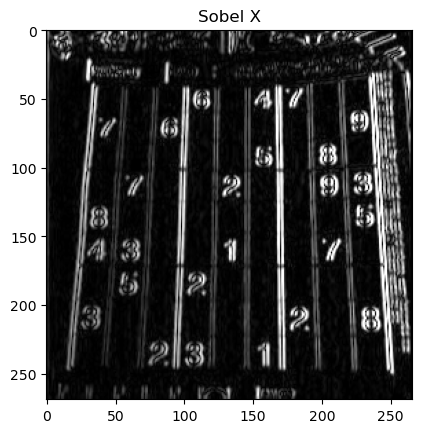

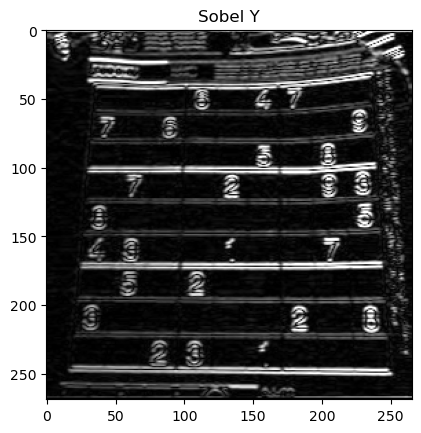

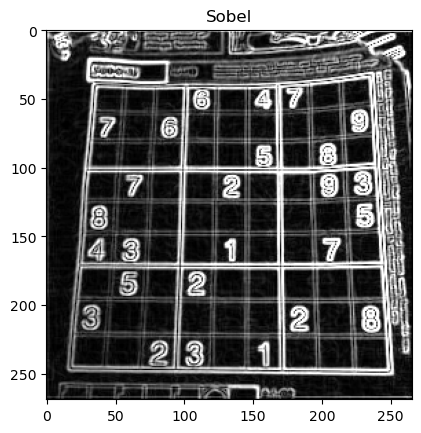

In [22]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt
img = cv2.imread('data/dave.jpg',0) #sobel.jpg
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)

sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.convertScaleAbs(sobely)
sobel = cv2.add(sobelx,sobely)
sobel = cv2.convertScaleAbs(sobel)
'''
plt.imshow(img,cmap = 'gray')
plt.title('Original')
plt.show()
'''
plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X')
plt.show()
plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y')
plt.show()
plt.imshow(sobel,cmap = 'gray')
plt.title('Sobel')
plt.show()

## 4. Laplacian算子
Laplacian算子是基於二階導數的邊緣檢測方法。它通過計算圖像的拉普拉斯變換來檢測邊緣

- **雙向檢測**：可以檢測正向和反向的邊緣
- **敏感度高**：對於邊緣的變化非常敏感
- **應用場景**：需要強烈邊緣檢測的場合

Laplacian算子可能需要進一步處理，以減少噪聲和多餘的邊緣
```python
laplacian = cv2.Laplacian(img,cv2.CV_64F)
abslaplacian = cv2.convertScaleAbs(laplacian)
```



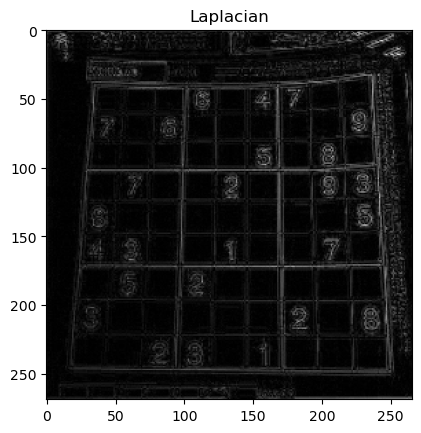

In [23]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt
img = cv2.imread('data/dave.jpg',0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
abslaplacian = cv2.convertScaleAbs(laplacian)
plt.imshow(abslaplacian,cmap = 'gray')
plt.title('Laplacian')
plt.show()

## 5. Canny算子
Canny演算法是一個複合性高效的邊緣偵測演算法，結合了高斯模糊、梯度計算、非極大值抑制和邊緣連接四個演算法去實踐邊緣偵測

- **精確邊緣**：通過多個步驟來確保邊緣的精確性
- **抑制噪聲**：高斯模糊過程減少了噪聲的影響
- **非極大值抑制**：確保邊緣是單一且明確的
- **應用場景**：其中最好的邊緣檢測方法，在雜訊處理與邊緣定位都有不錯的表現<br>標示出的邊緣與實際邊緣接近且邊緣線條細緻 
```python
# 應用Canny邊緣檢測
edges = cv2.Canny(image, 100, 200)
```


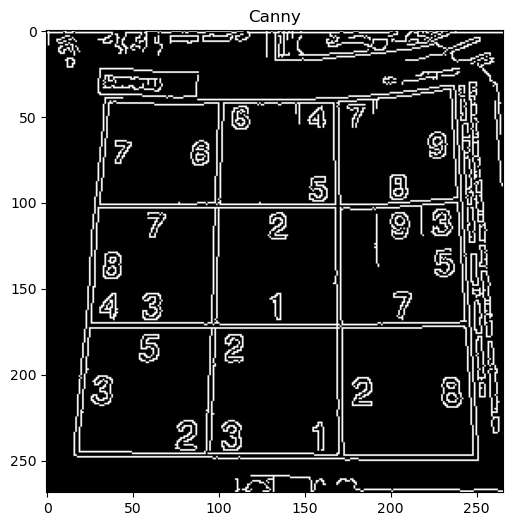

In [25]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt
img = cv2.imread('data/dave.jpg',0) #laplacian.jpg
canny = cv2.Canny(img,100,200)
plt.figure(figsize=(6, 6))
plt.imshow(canny,cmap = 'gray')
plt.title('Canny')
plt.show()

## 結論
這些邊緣檢測算子各自有其特點和應用場景。選擇合適的邊緣檢測算法取決於圖像特徵和應用需求

## 調整Canny門檻值，使Edge的品質最好

In [27]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt

#建立回调函数
def changeThreshold(x):
    lth=cv2.getTrackbarPos('low','image')
    hth=cv2.getTrackbarPos('high','image')
    canny = cv2.Canny(img,lth,hth)
    cv2.imshow('image',canny)
#建立一影像
img = cv2.imread('data/dave.jpg',0)

cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.createTrackbar('low','image',0,255,changeThreshold)
cv2.createTrackbar('high','image',0,255,changeThreshold)
while(True):
    if cv2.waitKey(1)&0xFF==27:
        break
cv2.destroyAllWindows()

# 道路邊緣識別實戰 Canny edge detection
## 先嘗試讀影像，Path:'data/exit-ramp.PNG'，進行Canny預測調整參數
## 嘗試load一段車載影片，Path:'data/Highway.mp4'，進行Canny即時預測